In [10]:
import matplotlib.pyplot as plt

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cpu'

# Linear Regression 

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)#try without squeeze
y = weight * X + bias 

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

In [5]:
train_split =int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [6]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

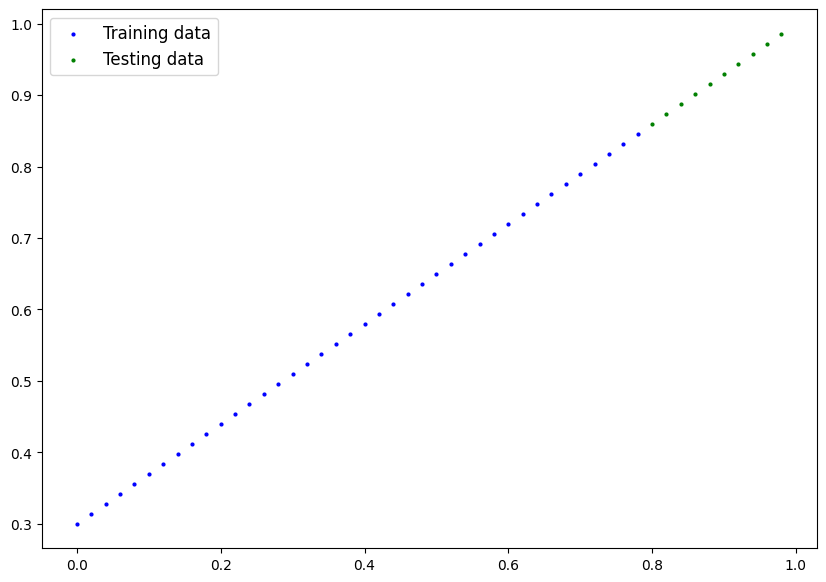

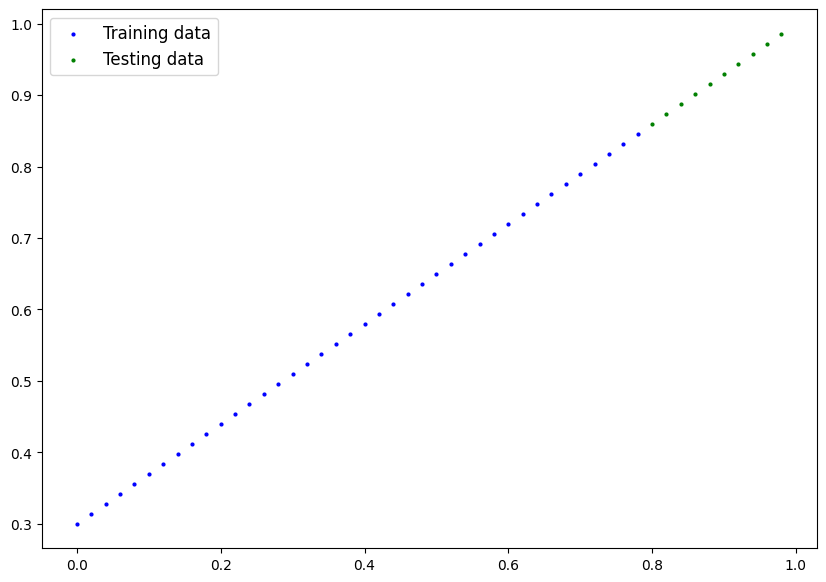

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels =y_train,
                     test_data =X_test,
                     test_labels = y_test,
                     predictions=None ):
    
    plt.figure(figsize =(10,7))
    
    plt.scatter(train_data,train_labels,c='b',s=4,label ='Training data')
    
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
    
    if predictions is not None :
        
        plt.scatter(test_data,predictions,c='r',s=4,label ='Predictions')
        
    plt.legend(prop ={'size':12})
    
plot_predictions()
plt.show()

# Bulid Model

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True
                                               ,dtype =torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype =torch.float))
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [12]:
torch.manual_seed(42)
model_o = LinearRegressionModel()
list(model_o.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_o

LinearRegressionModel()

In [14]:
list(model_o.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
torch.randn(1)

tensor([0.2345])

In [16]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [17]:
model_o.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
weight,bias

(0.7, 0.3)

In [19]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
with torch.inference_mode():
    y_preds = model_o(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
y_preds = model_o(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [22]:
with torch.inference_mode():
    y_preds = model_o(X_test)
  
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [23]:
with torch.no_grad():
    y_preds = model_o(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [24]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [25]:
plot_predictions(predictions=y_preds)

In [26]:
list(model_o.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
model_o.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [28]:
loss_fun = nn.L1Loss()

In [29]:
optimizer = torch.optim.Adam(params=model_o.parameters(),lr = 0.01)

In [30]:
loss_fun = nn.L1Loss()
optimizer = torch.optim.SGD(params =model_o.parameters(),lr=0.01)

# training Loop

In [31]:

list(model_o.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [32]:
list(model_o.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
torch.manual_seed(42)

epochs = 15
#epoch_count =[]
#loss_values =[]
test_loss_values =[]

for epoch in range(epochs):
    model_o.train()
    
    #forward pass
    y_pred = model_o(X_train)
    
    #cal the loss
    loss = loss_fun(y_pred,y_train)
    print(f'loss :{loss}')
    #
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    
    model_o.eval()

loss :0.31288138031959534
loss :0.3013603389263153
loss :0.28983935713768005
loss :0.2783183455467224
loss :0.26679736375808716
loss :0.2552763521671295
loss :0.24375534057617188
loss :0.23223432898521423
loss :0.22071333229541779
loss :0.20919232070446014
loss :0.1976713240146637
loss :0.18615034222602844
loss :0.1746293306350708
loss :0.16310831904411316
loss :0.1515873372554779


In [34]:
model_o.state_dict()

OrderedDict([('weights', tensor([0.3952])), ('bias', tensor([0.2788]))])

In [35]:
with torch.inference_mode():
    y_preds_new = model_o(X_test)

In [36]:
torch.manual_seed(42)

epochs = 150
epoch_count =[]
loss_values =[]
test_loss_values =[]

for epoch in range(epochs):
    model_o.train()
    
    #forward pass
    y_pred = model_o(X_train)
    
    #cal the loss
    loss = loss_fun(y_pred,y_train)
    print(f'loss :{loss}')
    #
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    
    model_o.eval()
    with torch.inference_mode():
        test_pred = model_o(X_test)
        
        test_loss = loss_fun(test_pred,y_test)
        
    if epoch % 10 == 0 :
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epochs : {epoch} , loss :{loss} , test loss : {test_loss} ")
        print(model_o.state_dict())

loss :0.14006635546684265
Epochs : 0 , loss :0.14006635546684265 , test loss : 0.27900025248527527 
OrderedDict([('weights', tensor([0.3991])), ('bias', tensor([0.2888]))])
loss :0.1285453587770462
loss :0.11702437698841095
loss :0.1060912236571312
loss :0.09681284427642822
loss :0.08908725529909134
loss :0.08227583020925522
loss :0.07638873159885406
loss :0.07160007208585739
loss :0.06747635453939438
loss :0.06395438313484192
Epochs : 10 , loss :0.06395438313484192 , test loss : 0.17353470623493195 
OrderedDict([('weights', tensor([0.4361])), ('bias', tensor([0.3613]))])
loss :0.06097004935145378
loss :0.05845819041132927
loss :0.05635259300470352
loss :0.0545857772231102
loss :0.053148526698350906
loss :0.05181945487856865
loss :0.05069301277399063
loss :0.0498228520154953
loss :0.04895269125699997
loss :0.04819351062178612
Epochs : 20 , loss :0.04819351062178612 , test loss : 0.12584610283374786 
OrderedDict([('weights', tensor([0.4639])), ('bias', tensor([0.3843]))])
loss :0.047531

In [37]:
epoch_count,loss_values,test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
 [tensor(0.1401, grad_fn=<MeanBackward0>),
  tensor(0.0640, grad_fn=<MeanBackward0>),
  tensor(0.0482, grad_fn=<MeanBackward0>),
  tensor(0.0434, grad_fn=<MeanBackward0>),
  tensor(0.0399, grad_fn=<MeanBackward0>),
  tensor(0.0365, grad_fn=<MeanBackward0>),
  tensor(0.0330, grad_fn=<MeanBackward0>),
  tensor(0.0296, grad_fn=<MeanBackward0>),
  tensor(0.0262, grad_fn=<MeanBackward0>),
  tensor(0.0227, grad_fn=<MeanBackward0>),
  tensor(0.0193, grad_fn=<MeanBackward0>),
  tensor(0.0159, grad_fn=<MeanBackward0>),
  tensor(0.0124, grad_fn=<MeanBackward0>),
  tensor(0.0090, grad_fn=<MeanBackward0>),
  tensor(0.0056, grad_fn=<MeanBackward0>)],
 [tensor(0.2790),
  tensor(0.1735),
  tensor(0.1258),
  tensor(0.1047),
  tensor(0.0937),
  tensor(0.0847),
  tensor(0.0765),
  tensor(0.0682),
  tensor(0.0606),
  tensor(0.0523),
  tensor(0.0441),
  tensor(0.0365),
  tensor(0.0282),
  tensor(0.0206),
  tensor(0.0123)])

In [40]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([0.14006636, 0.06395438, 0.04819351, 0.04343796, 0.03993364,
        0.03647511, 0.03304323, 0.02960443, 0.02617318, 0.02273961,
        0.01930081, 0.01587125, 0.01243599, 0.00899776, 0.00556932],
       dtype=float32),
 [tensor(0.2790),
  tensor(0.1735),
  tensor(0.1258),
  tensor(0.1047),
  tensor(0.0937),
  tensor(0.0847),
  tensor(0.0765),
  tensor(0.0682),
  tensor(0.0606),
  tensor(0.0523),
  tensor(0.0441),
  tensor(0.0365),
  tensor(0.0282),
  tensor(0.0206),
  tensor(0.0123)])

In [41]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label ='train loss')
plt.plot(epoch_count,test_loss_values,label ='testing loss')
plt.title('training an testing loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [42]:
model_o.state_dict()

OrderedDict([('weights', tensor([0.6894])), ('bias', tensor([0.3043]))])

In [43]:
with torch.inference_mode():
    y_preds_new =model_o(X_test)

In [44]:
model_o.state_dict()

OrderedDict([('weights', tensor([0.6894])), ('bias', tensor([0.3043]))])

In [45]:
weight,bias

(0.7, 0.3)

In [46]:
plot_predictions(predictions=y_preds)

In [47]:
plot_predictions(predictions=y_preds_new)

# Saving models 

In [ ]:
#model_o.state_dict()

In [ ]:
#from pathlib import Path
#model_path = Path('models')
#model_path.mkdir(parents =True , exist_ok=True)

In [ ]:
#model_name ='01_pytorch_workflow_model_0.pth '
#model_save_path = model_path / model_name
#model_save_path

In [ ]:
#print(f"Saving model to : {model_save_path}")
#torch.save(obj=model_o.state_dict(),f=model_save_path)

# model loading

In [ ]:
#model_o.state_dict()

In [ ]:
#loaded_model_0 = LinearRegressionModel()

In [ ]:
#loaded_model_0.state_dict()

In [ ]:
#loaded_model_0.load_state_dict(torch.load(f = model_save_path))

In [ ]:
#loaded_model_0.state_dict()

In [ ]:
#loaded_model_0.eval()
#with torch.inference_mode():
 #   load_model_preds = loaded_model_0(X_test)
    
#load_model_preds

In [ ]:
#y_preds == load_model_preds

In [ ]:
#y_preds

# Putting everything together 

In [53]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias 

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [54]:
train_split = int(len(X)*0.8)
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [55]:
plot_predictions(X_train,y_train,X_test,y_test)

In [56]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear ( in_features = 1 ,
                                     out_features = 1 )
        
    def forward(self,x:torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)
        
torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1,model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [57]:
next(model_1.parameters()).device

device(type='cpu')

In [58]:
loss_fun = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

torch.manual_seed(42)

epochs = 201 

for epoch in range(epochs):
    
    model_1.train()
    
    y_pred = model_1(X_train)
    
    loss = loss_fun(y_pred,y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_1.eval()
    
    with torch.inference_mode():
        
        test_pred = model_1(X_test)
        
        test_loss = loss_fun(test_pred,y_test)
        
        
        if epoch % 10 == 0 :
        
            print(f"Epochs : {epoch} , loss :{loss} , test loss : {test_loss} ")

Epochs : 0 , loss :0.5551779866218567 , test loss : 0.5739762187004089 
Epochs : 10 , loss :0.4399680495262146 , test loss : 0.4392663538455963 
Epochs : 20 , loss :0.3247582018375397 , test loss : 0.30455657839775085 
Epochs : 30 , loss :0.20954827964305878 , test loss : 0.16984674334526062 
Epochs : 40 , loss :0.09433844685554504 , test loss : 0.03513689711689949 
Epochs : 50 , loss :0.023886386305093765 , test loss : 0.04784906655550003 
Epochs : 60 , loss :0.0199567973613739 , test loss : 0.04580312222242355 
Epochs : 70 , loss :0.016517987474799156 , test loss : 0.0375305712223053 
Epochs : 80 , loss :0.013089170679450035 , test loss : 0.029944902285933495 
Epochs : 90 , loss :0.009653178043663502 , test loss : 0.02167237363755703 
Epochs : 100 , loss :0.006215679459273815 , test loss : 0.014086711220443249 
Epochs : 110 , loss :0.002787243574857712 , test loss : 0.005814164876937866 
Epochs : 120 , loss :0.0012645035749301314 , test loss : 0.013801807537674904 
Epochs : 130 , los

In [60]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [61]:
weight,bias

(0.7, 0.3)

In [63]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
    
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

# saving and load model